In [1]:
# TODO, show differences related to post-selecting for depth vs post-selectng for total gates added
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import SabreMS, QiskitLevel3
from transpile_benchy.metrics.abc_metrics import MetricInterface
from transpile_benchy.metrics.gate_counts import DepthMetric
from mirror_gates.utilities import DoNothing

In [2]:
class LayoutTrialsMetric(MetricInterface):
    def __init__(self):
        """Initialize the metric."""
        super().__init__(name="layout_trials_var", pretty_name="Layout Trial Variance")

    def _construct_pass(self):
        """Return the pass associated with this metric."""
        return DoNothing()

In [3]:
from transpile_benchy.library import CircuitLibrary

# library = CircuitLibrary.from_txt("../medium_circuits.txt")
library = CircuitLibrary.from_txt("qft.txt")

In [4]:
coupling_map = CouplingMap.from_heavy_hex(5)
transpilers = [
    QiskitLevel3(coupling_map),
    SabreMS(coupling_map, name="SABREMS", anneal_routing=False),
    SabreMS(coupling_map, name="SABREMS-Anneal", anneal_routing=True),
]

metrics = [LayoutTrialsMetric(), DepthMetric(consolidate=False)]

In [5]:
from transpile_benchy.benchmark import Benchmark

# only interested in TimeMetric, is there by default
benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    num_runs=1,
)
benchmark.run()

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Circuits from library:   0%|          | 0/8 [00:00<?, ?it/s]

Loading qft_n4 from QASMBench


Circuits from library:  12%|█▎        | 1/8 [00:24<02:50, 24.35s/it]

Loading qft_n6 from MQTBench


Circuits from library:  25%|██▌       | 2/8 [00:52<02:40, 26.69s/it]

Loading qft_n8 from MQTBench


Circuits from library:  38%|███▊      | 3/8 [01:26<02:29, 29.80s/it]

Loading qft_n10 from MQTBench


Circuits from library:  50%|█████     | 4/8 [02:05<02:14, 33.56s/it]

Loading qft_n16 from MQTBench


Circuits from library:  62%|██████▎   | 5/8 [03:13<02:17, 45.98s/it]

Loading qft_n18 from QASMBench


Circuits from library:  75%|███████▌  | 6/8 [04:35<01:56, 58.37s/it]

Loading qft_n32 from MQTBench


Circuits from library:  88%|████████▊ | 7/8 [08:18<01:51, 111.94s/it]

Loading qft_n34 from MQTBench


Circuits from library: 100%|██████████| 8/8 [12:46<00:00, 95.78s/it] 


In [7]:
print(benchmark)


Transpiler: SABREMS-$\sqrt{\texttt{iSWAP}}$

  Metric: layout_trials_var
  Circuit: qft_n10                                  Mean result: 28.972                         Trials: [28.972222222222225]
  Circuit: qft_n16                                  Mean result: 513.535                        Trials: [513.5347222222222]
  Circuit: qft_n18                                  Mean result: 974.972                        Trials: [974.9722222222223]
  Circuit: qft_n32                                  Mean result: 5786.868                       Trials: [5786.868055555555]
  Circuit: qft_n34                                  Mean result: 1924.139                       Trials: [1924.1388888888887]
  Circuit: qft_n4                                   Mean result: 0.500                          Trials: [0.5]
  Circuit: qft_n6                                   Mean result: 3.556                          Trials: [3.5555555555555554]
  Circuit: qft_n8                                   Mean result: 23.2

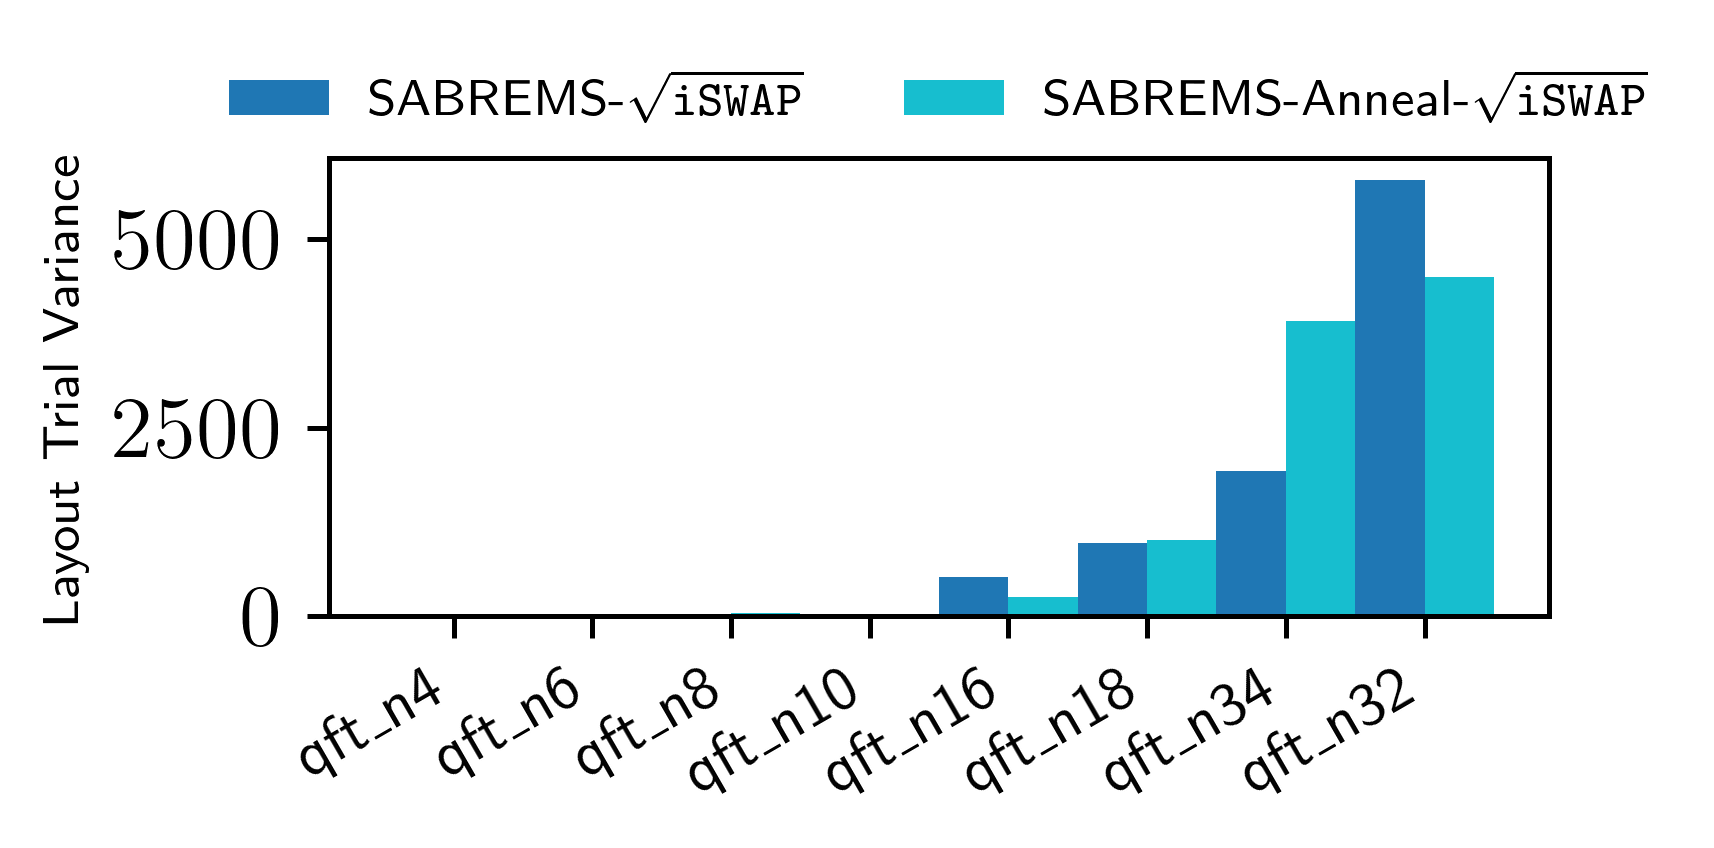

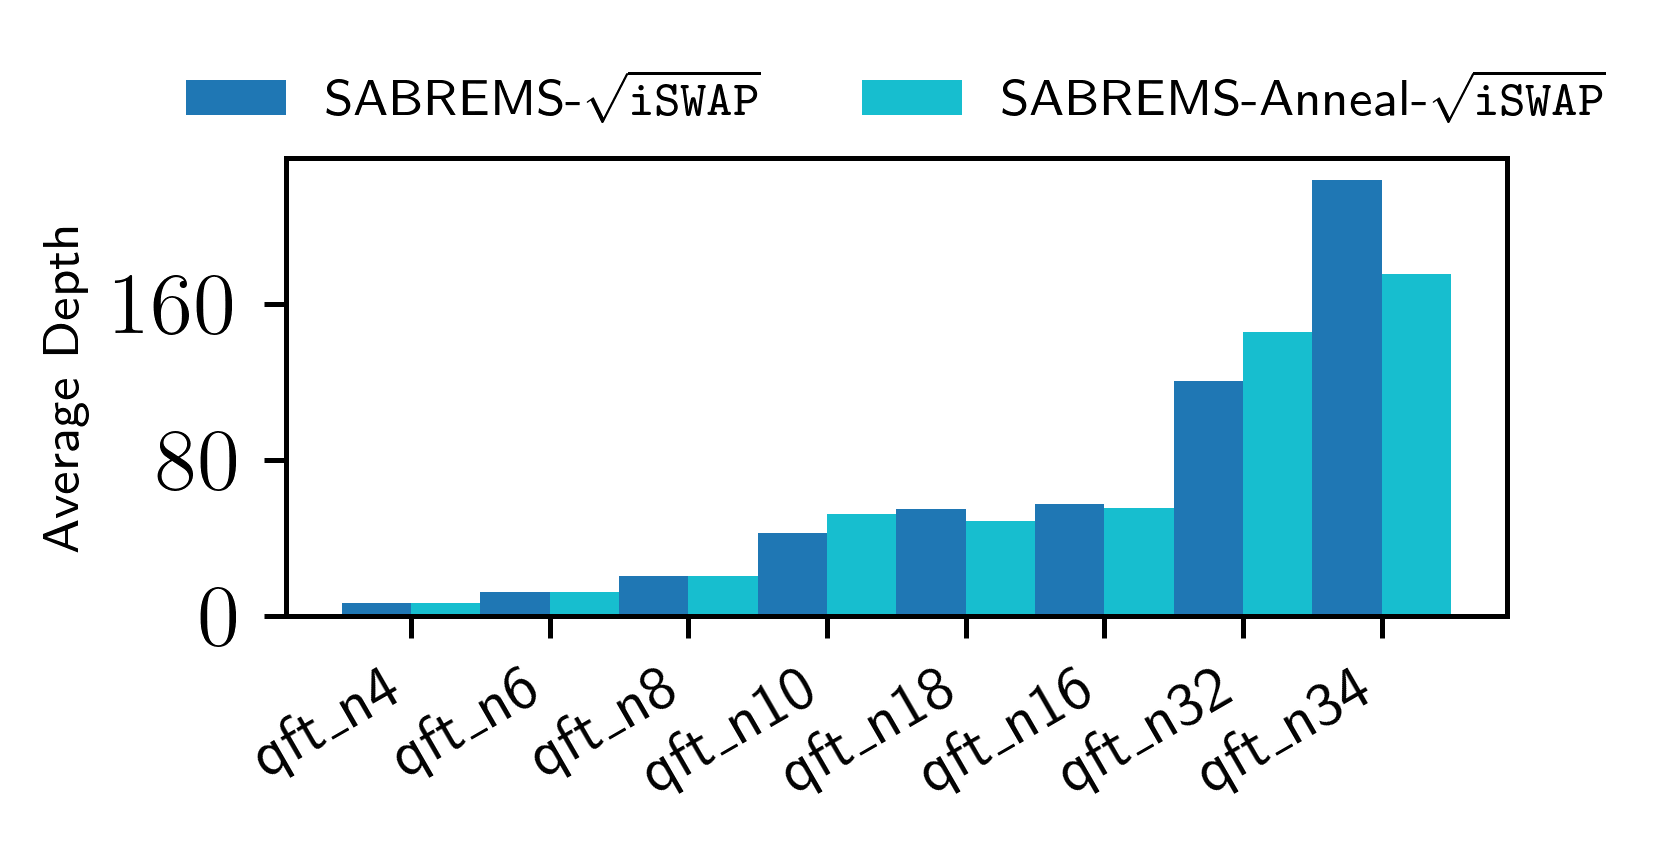

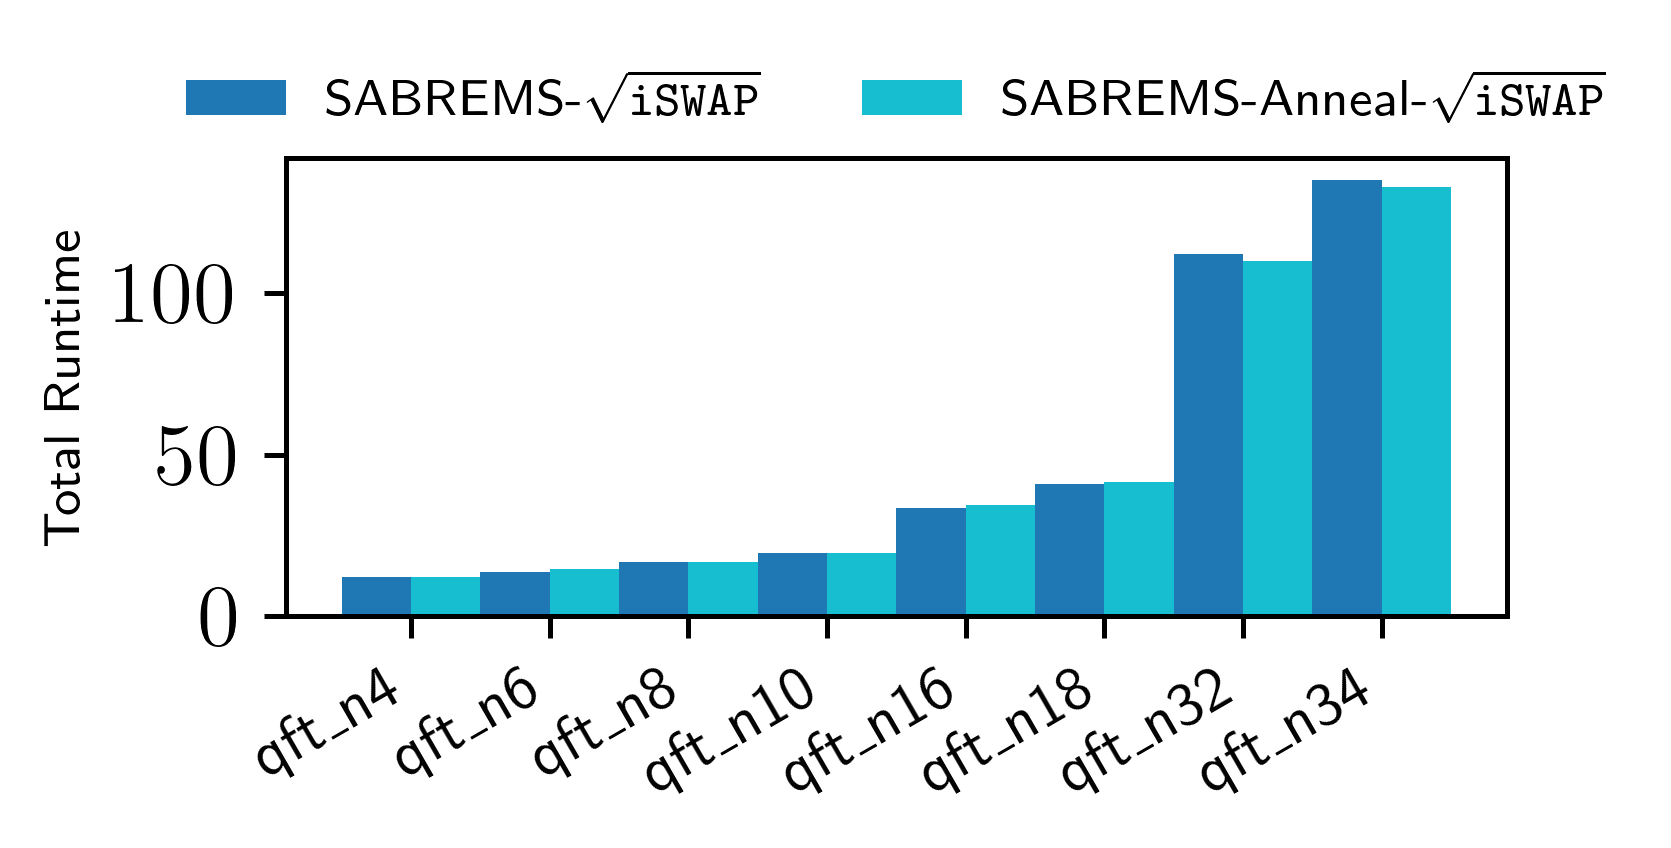

In [6]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=0, legend_show=1, filename="anneal")